# Go-to-Market (G2M) insight for a firm looking to make a Cab Investment

## Problem Statement

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Data Set
Below are the list of four datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

In [11]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Importing datasets 
cab_data = pd.read_csv("Cab-Files/Cab_Data.csv")
city = pd.read_csv("Cab-Files/City.csv")
customer_id = pd.read_csv("Cab-Files/Customer_ID.csv")
transaction_id = pd.read_csv("Cab-Files/Transaction_ID.csv")

In [7]:
city

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [8]:
cab_data

Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04         125.20       97.6320  
3              33.17         377.40      351.6020  
4               8.73         114.62       97.7760  
...              ...            ...           ...  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  

[359392 rows x 7 columns]

In [9]:
customer_id

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

In [10]:
transaction_id

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

In [13]:
cab_data.info()
city.info()
customer_id.info()
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

In [17]:
#Check for duplicates
cab_data.duplicated().sum()
city.duplicated().sum()
customer_id.duplicated().sum()
transaction_id.duplicated().sum()

0

### Merge datasets to perform EDA

In [20]:
df = pd.merge(transaction_id, customer_id).merge(cab_data, on="Transaction ID").merge(city, on = "City")
df

Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
359387        10307228        51406         Cash  Female   29   
359388        10319775        51406         Cash  Female   29   
359389        10347676        51406         Card  Female   29   
359390        10358624        51406         Cash  Female   29   
359391        10370709        51406         Card  Female   29   

        Income (USD/Month)  Date of Travel     Company           City  \
0                    10813           42377    Pink Cab     ATLANTA GA   
1                    10813           43302  Yellow Cab     ATLANTA GA   
2                    10813           43427  Yellow Cab     ATLANTA GA   
3                     9237           42375    Pink Cab     ATLANTA GA   
4                     9237           43211  Yellow Cab     ATLANTA GA   
...                    ...             ...         ...            ...   
359387                6829           43162  Yellow Cab  WASHINGTON DC   
359388                6829           43203  Yellow Cab  WASHINGTON DC   
359389                6829           43287  Yellow Cab  WASHINGTON DC   
359390                6829           43314  Yellow Cab  WASHINGTON DC   
359391                6829           43342  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip Population      Users  
0              30.45         370.95      313.6350   814,885     24,701   
1              26.19         598.70      317.4228   814,885     24,701   
2              42.55         792.05      597.4020   814,885     24,701   
3              28.62         358.52      334.8540   814,885     24,701   
4              36.38         721.10      467.1192   814,885     24,701   
...              ...            ...           ...        ...        ...  
359387         38.40         668.93      525.3120   418,859    127,001   
359388          3.57          67.60       44.5536   418,859    127,001   
359389         23.46         331.97      337.8240   418,859    127,001   
359390         27.60         358.23      364.3200   418,859    127,001   
359391         34.24         453.11      427.3152   418,859    127,001   

[359392 rows x 14 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [25]:
# Defining new features for our analysis

# Profit
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# Profit per Kilometer
df['Profit per KM'] = df['Profit'] / df['KM Travelled']
df.head()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

   Date of Travel     Company        City  KM Travelled  Price Charged  \
0           42377    Pink Cab  ATLANTA GA         30.45         370.95   
1           43302  Yellow Cab  ATLANTA GA         26.19         598.70   
2           43427  Yellow Cab  ATLANTA GA         42.55         792.05   
3           42375    Pink Cab  ATLANTA GA         28.62         358.52   
4           43211  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Population     Users    Profit  Profit per KM  
0      313.6350   814,885    24,701    57.3150       1.882266  
1      317.4228   814,885    24,701   281.2772      10.739870  
2      597.4020   814,885    24,701   194.6480       4.574571  
3      334.8540   814,885    24,701    23.6660       0.826904  
4      467.1192   814,885    24,701   253.9808       6.981330

In [27]:
# Income Group
def income_group(income):
    if income <= 32048:
        return "Poor or near-poor"
    elif income <= 53413:
        return "Lower-middle class"
    elif income <= 106827:
        return "Middle class"
    elif income <= 373894:
        return "Upper-middle class"
    else:
        return "Rich"

df["Income Group"] = (df["Income (USD/Month)"]*12).apply(income_group).astype("category")

display(df.head())
df.info()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

   Date of Travel     Company        City  KM Travelled  Price Charged  \
0           42377    Pink Cab  ATLANTA GA         30.45         370.95   
1           43302  Yellow Cab  ATLANTA GA         26.19         598.70   
2           43427  Yellow Cab  ATLANTA GA         42.55         792.05   
3           42375    Pink Cab  ATLANTA GA         28.62         358.52   
4           43211  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Population     Users    Profit  Profit per KM  \
0      313.6350   814,885    24,701    57.3150       1.882266   
1      317.4228   814,885    24,701   281.2772      10.739870   
2      597.4020   814,885    24,701   194.6480       4.574571   
3      334.8540   814,885    24,701    23.6660       0.826904   
4      467.1192   814,885    24,701   253.9808       6.981330   

         Income Group  
0  Upper-middle class  
1  Upper-middle class  
2  Upper-middle class  
3  Upper-middle class  
4  Upper-middle class

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      359392 non-null  int64   
 1   Customer ID         359392 non-null  int64   
 2   Payment_Mode        359392 non-null  object  
 3   Gender              359392 non-null  object  
 4   Age                 359392 non-null  int64   
 5   Income (USD/Month)  359392 non-null  int64   
 6   Date of Travel      359392 non-null  int64   
 7   Company             359392 non-null  object  
 8   City                359392 non-null  object  
 9   KM Travelled        359392 non-null  float64 
 10  Price Charged       359392 non-null  float64 
 11  Cost of Trip        359392 non-null  float64 
 12  Population          359392 non-null  object  
 13  Users               359392 non-null  object  
 14  Profit              359392 non-null  float64 
 15  Profit per KM    

## Most Popular Company for each city

In [28]:
city_list = []
pink_cab_city = []
yellow_cab_city = []

for city in cab_data['City'].unique():
    pink_cabs = cab_data[(cab_data['City'] == city) & (cab_data['Company'] == 'Pink Cab')].shape[0]
    yellow_cabs = cab_data[(cab_data['City'] == city) & (cab_data['Company'] == 'Yellow Cab')].shape[0]
    city_list.append(city)
    pink_cab_city.append(pink_cabs)
    yellow_cab_city.append(yellow_cabs)

print(pink_cab_city)
print(yellow_cab_city)
print(city_list)

[1762, 1868, 5186, 9361, 1380, 1394, 19865, 2002, 1841, 13967, 1513, 864, 682, 1334, 10672, 2732, 3797, 799, 3692]
[5795, 3028, 24506, 47264, 5637, 2431, 28168, 4452, 1169, 85918, 2469, 1200, 631, 1033, 9816, 5265, 4722, 1132, 40045]
['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']


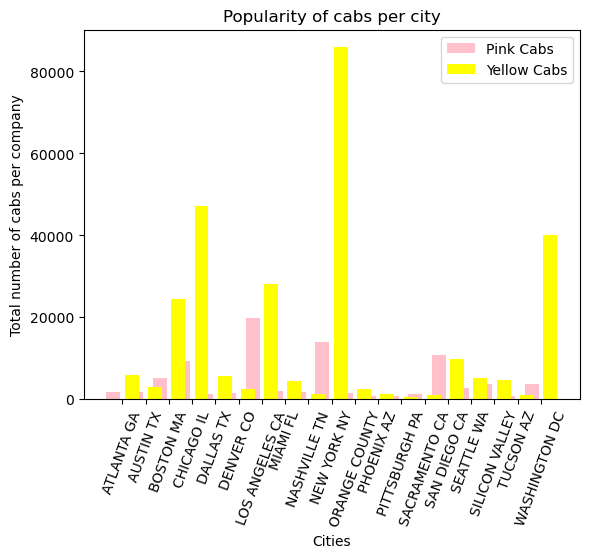

In [29]:
X_axis = np.arange(len(city_list))
plt.bar(X_axis - 0.4, pink_cab_city, 0.6, color = 'pink', label = 'Pink Cabs')
plt.bar(X_axis + 0.4, yellow_cab_city, 0.6, color = 'yellow', label = 'Yellow Cabs')

plt.xticks(X_axis, city_list, rotation=70)
plt.xlabel("Cities")
plt.ylabel("Total number of cabs per company")
plt.title("Popularity of cabs per city")
plt.legend()
plt.show()

## Age distribution of users

[Text(0.5, 1.0, 'Age Distribution for Yellow Cab')]

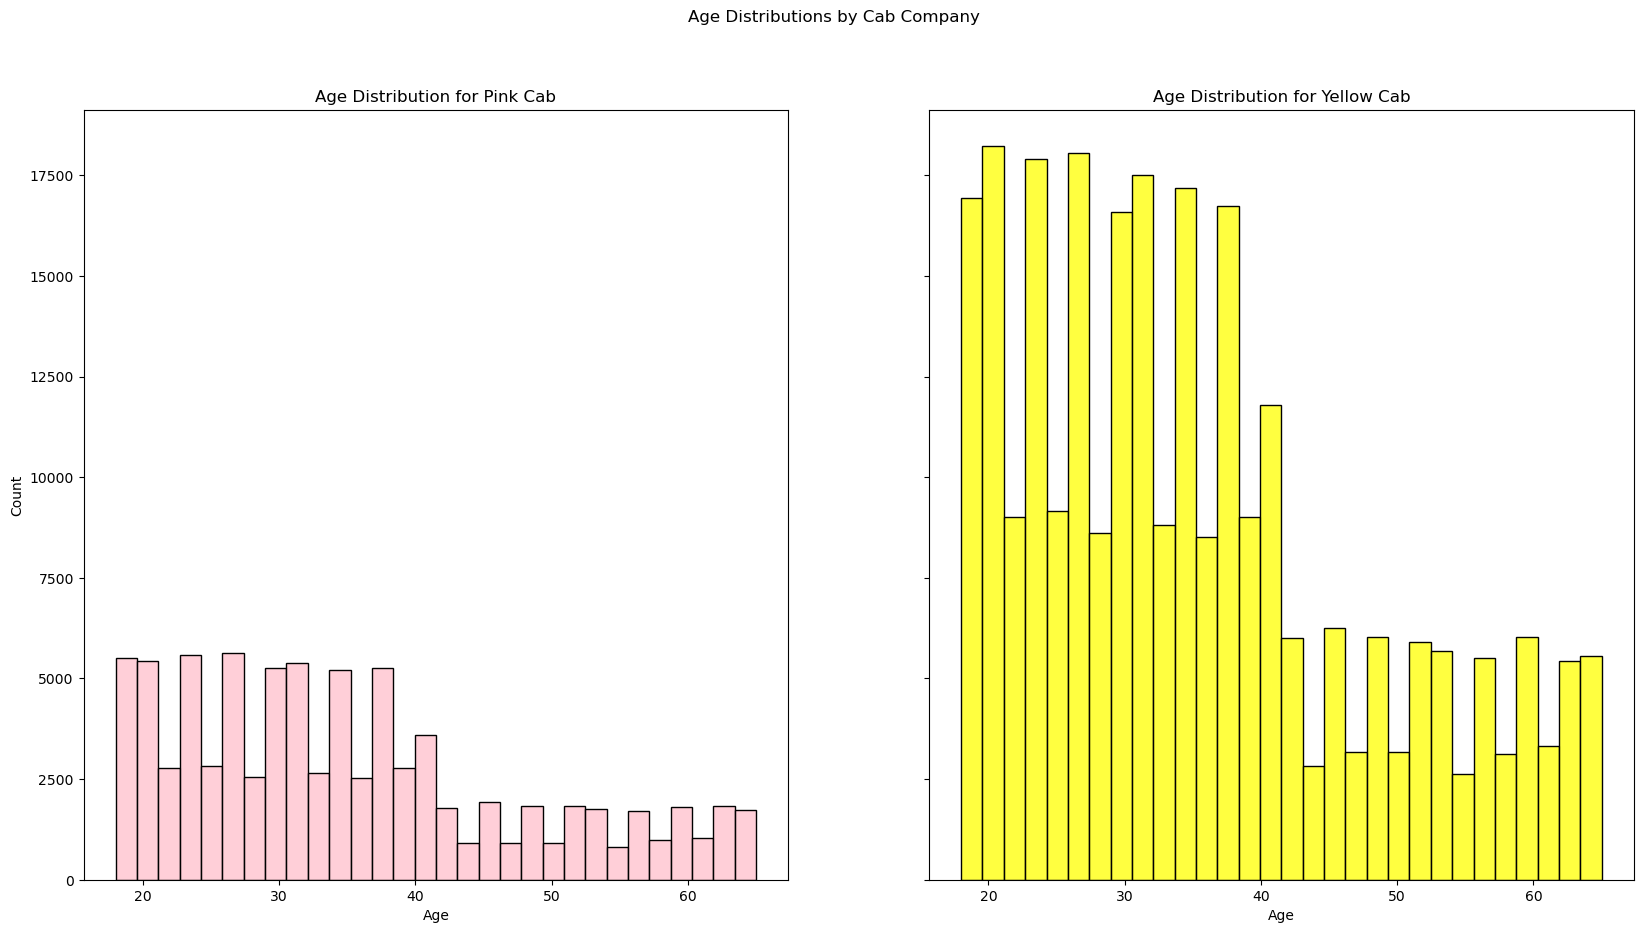

In [31]:
# Seprate the master dateset in to pink_dataset and yellow_dataset
pink_cabs = df[df['Company'] == 'Pink Cab'] 
yellow_cabs = df[df['Company'] == 'Yellow Cab']

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle("Age Distributions by Cab Company")

sns.histplot(ax=axes[0], data=pink_cabs, x='Age', color="pink", bins=30).set(title="Age Distribution for Pink Cab")
sns.histplot(ax=axes[1], data=yellow_cabs, x='Age', color="yellow", bins=30).set(title="Age Distribution for Yellow Cab")

## Cab users per city

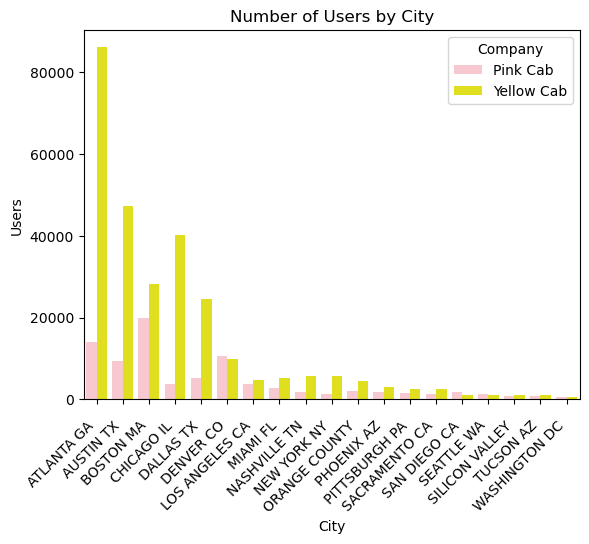

In [37]:
city_users_df = df.groupby(['Company', 'City'])['Users'].count().reset_index()
ax = sns.barplot(x = 'City', y = 'Users', data = city_users_df, hue = 'Company', palette = ['pink','yellow'], order = df.groupby(['City'])['Users'].count().reset_index().sort_values('Users', ascending=False).City)
ax.set_ylabel('Users')
ax.set_xlabel('City')
ax.set_title('Number of Users by City')

# Set positions and labels for x-ticks
positions = np.arange(len(city_users_df['City'].unique()))
labels = city_users_df['City'].unique()
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='right') # Rotate x-axis labels by 45 degrees and align to the right
ax.tick_params(axis='x', which='major', pad=10) # Add extra padding between tick labels and axis

## Cab company having users with better income

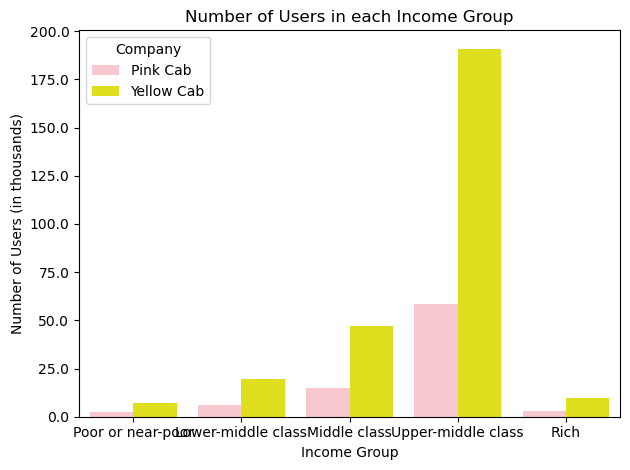

In [38]:
from matplotlib.ticker import FuncFormatter

income_group_df = df.groupby(['Company', 'Income Group'])['Users'].count().reset_index()

ax = sns.barplot(x = 'Income Group', y = 'Users', data = income_group_df, hue = 'Company', palette = ['pink','yellow'], order = ['Poor or near-poor','Lower-middle class','Middle class','Upper-middle class','Rich'])

thousands_formatter = lambda x, pos: f'{x / 1000}'

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_ylabel('Number of Users (in thousands)')
ax.set_title('Number of Users in each Income Group')
ax.set_xlabel('Income Group')

plt.tight_layout()
plt.show()

## Kilometer travelled by each cab company

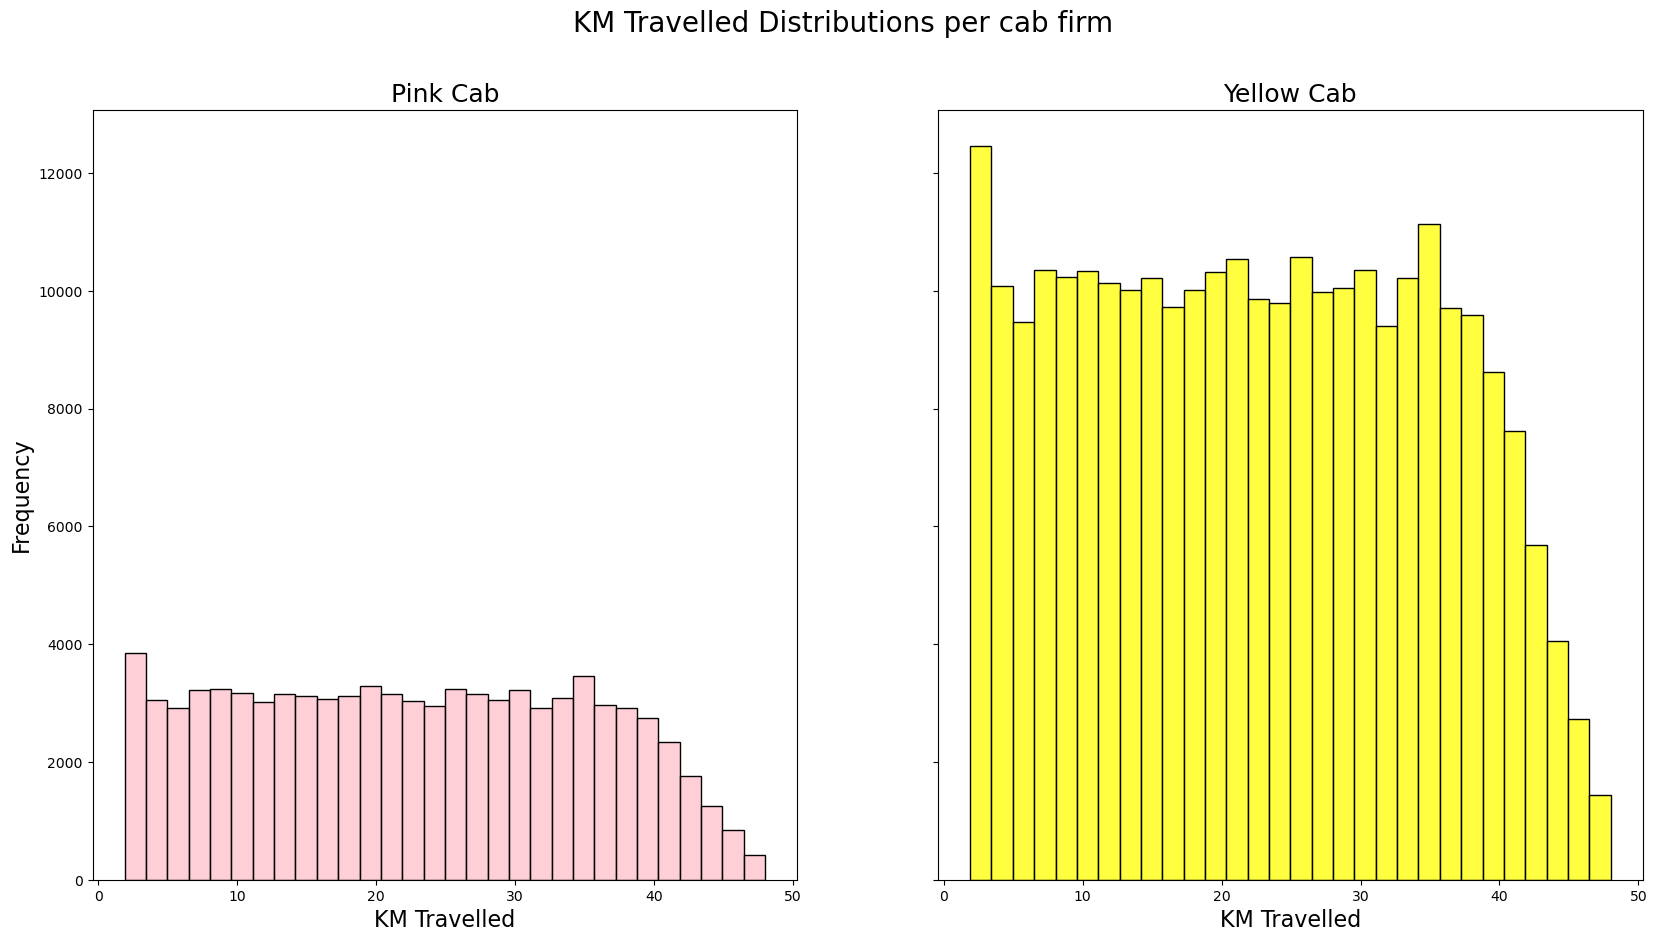

In [40]:
fig,axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle("KM Travelled Distributions per cab firm", fontsize=20)
sns.histplot(ax=axes[0],data=pink_cabs, x='KM Travelled', color="pink", bins=30).set_title("Pink Cab", fontsize=18)
sns.histplot(ax=axes[1],data=yellow_cabs, x='KM Travelled', color="yellow", bins=30).set_title("Yellow Cab", fontsize=18)

# Set x-axis label for both subplots
for ax in axes.flat:
    ax.set_xlabel("KM Travelled", fontsize=16)

# Set y-axis label for the first subplot
axes[0].set_ylabel("Frequency", fontsize=16);

## Cost of trip of each cab company

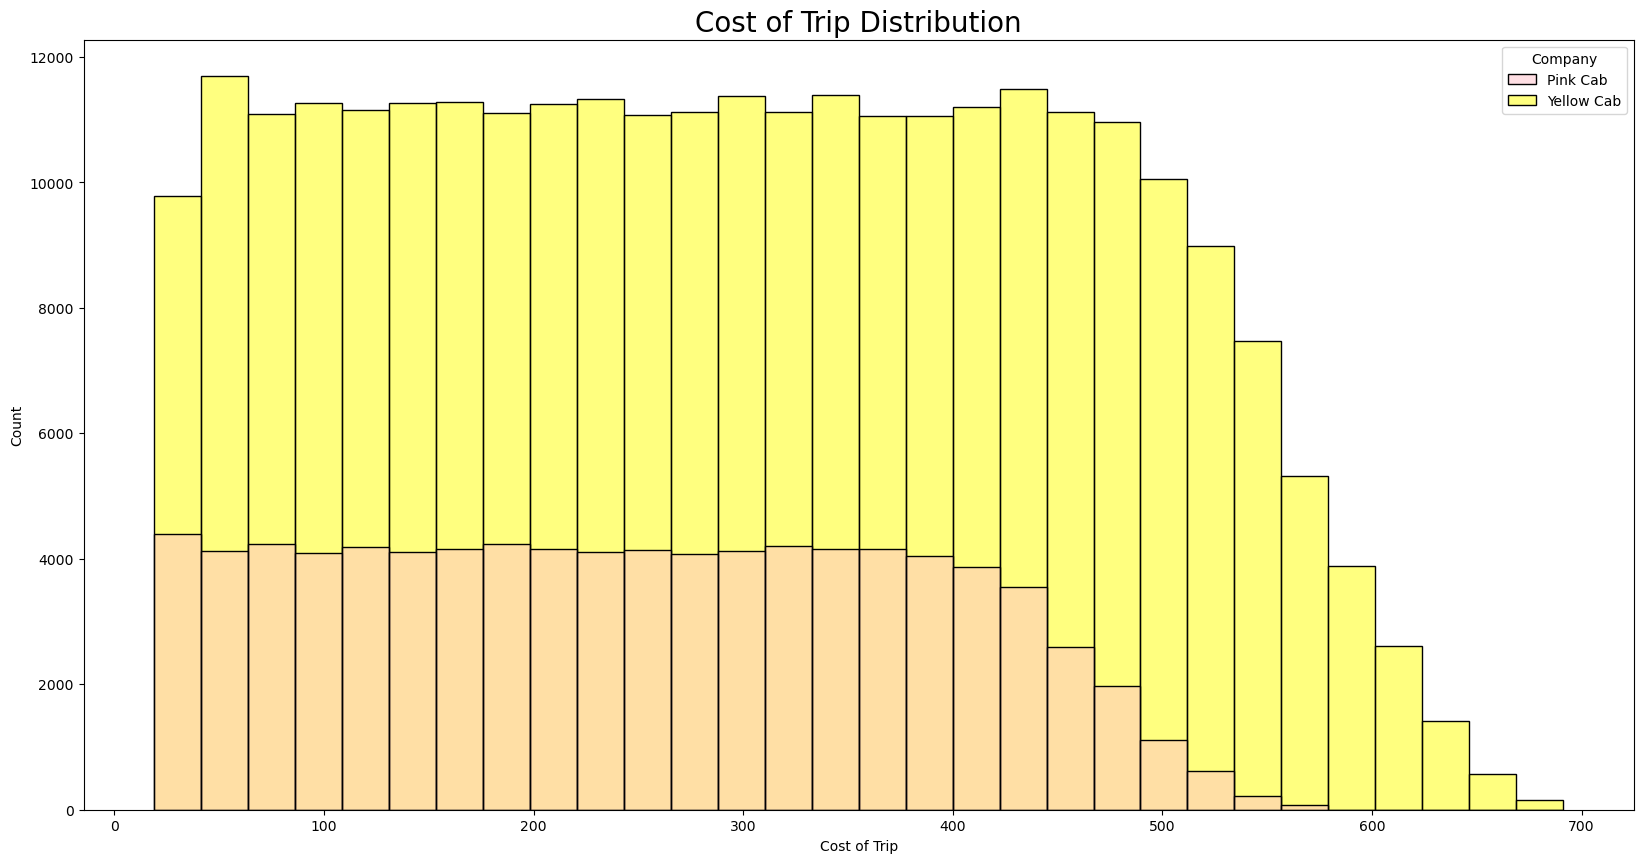

In [41]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="Cost of Trip",bins=30 , hue="Company", palette=['pink', 'yellow'])
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Cost of Trip')
plt.show()

## Kilometer travelled per price charged and cost of Trip

Text(0.5, 1.0, 'Cost of Trip - KM Travelled')

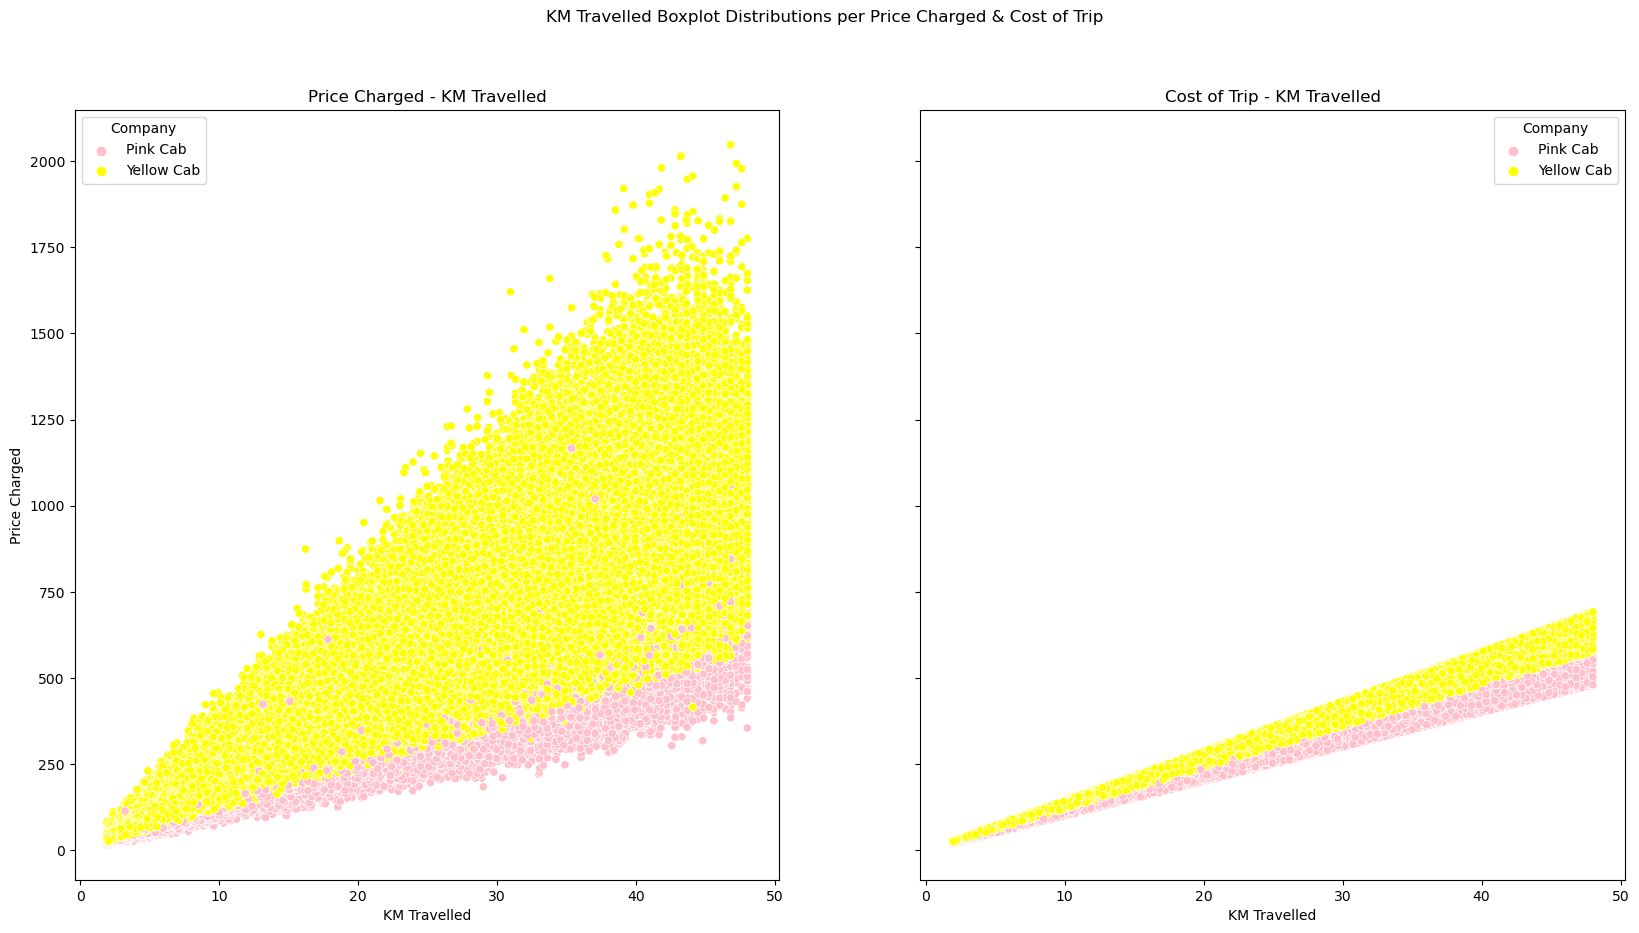

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('KM Travelled Boxplot Distributions per Price Charged & Cost of Trip')
sns.scatterplot(ax=axes[0], data=df, x='KM Travelled', y='Price Charged', hue="Company", palette=['pink', 'yellow']).set_title("Price Charged - KM Travelled")
sns.scatterplot(ax=axes[1], data=df, x='KM Travelled', y='Cost of Trip', hue="Company", palette=['pink', 'yellow']).set_title("Cost of Trip - KM Travelled")

## Conclusion
Following the analysis, we can state that the yellow company is the one in which the investment should be made, and as a result, it is the one that will make the most money and attract the most customers. The reasons for this are as follows:

1. People of all age use more yellow cab than pink cab.
2. Majority of the cab users take yellow can more than pink can in each city.
3. Every income group people prefer to use more yellow can than pink cab.
4. Distance travelled by yellow cab is more than pink cab.
5. Cost of trip for yellow cab is more than pink cab.
6. The profit generated by yellow cab is more than pink cab.

Taking into account all of these findings following the exploratory data analysis, we strongly recommend investing in the yellow cab industry.